In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from google.colab import drive
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import random
from random import randint
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

```
Devashish Vaibhav Deshpande 2020A3PS2207H
Faizal Shaikh 2020AAPS2107H
Vishnu Bharadwaz Gandlur 2020AAPS2198H
Siddhant Maharana 2020AAPS0419H

```

In [ ]:
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/creditcard.csv")

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **DATA PRE PROCESSING**


In [ ]:
#Engineering data
df = df.sample(frac=1)
df_fe = df
col = list(df_fe)
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
df.dropna()
# for col in columns:
#     df_fe = df_fe.fillna({col: df_fe[col].mean()})
x = np.array(df_fe[col])
y = np.array(df['Class'])

In [ ]:
smote = SMOTE(sampling_strategy=0.2)
x_resampled_orig, y_resampled_orig = smote.fit_resample(x, y)


### **RANDOM FOREST(FITNESS FUNCTION)**

In [ ]:
def get_fitness(features):
    train_size = int(len(x_resampled_orig)*0.3)
    x_resampled_df = pd.DataFrame(x_resampled_orig, columns=['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Class'])
    x_resampled_subset = x_resampled_df[features].values
    x_resampled_new =x_resampled_subset
    # x_resampled=np.delete(x_resampled, 29, 1)
    x_test = x_resampled_new[train_size:]
    x_train = x_resampled_new[:train_size]
    y_test = y_resampled_orig[train_size:]
    y_train = y_resampled_orig[:train_size]

    #RF classifier
    rf_clf = RandomForestClassifier(max_depth=3)

    #Train RF classifier
    rf_clf.fit(x_train, y_train)

    # Evaluate the model on testing data
    test_preds = rf_clf.predict(x_test)

    # Step 5: Store the predictions
    preds = test_preds

    # Step 6: Evaluate the predictions using accuracy as the performance metric
    accuracy = accuracy_score(y_test, preds)
    return accuracy

### **GENETIC ALGORITHM**

In [ ]:
tcol =np.delete(col, 30)
B = []
C = []
# Step 4: Generate initial population
np.random.shuffle(tcol)
#population = tcol[:16]

#Encoding
population=""
for i in range(30):
     k = random.randint(0, 1)
     population+= str(k);

# Step 5: Compute candidate feature vector
for i in range(3):


    # Step 6: Generate fitness value
    #fitness = get_fitness(population)
    features=[]
    for i in range(30):
        if(population[i]=='1'):
            features.append(col[i])
    fitness=get_fitness(features)


    # Step 7: Check if candidate feature vector is optimal
    if len(B) == 0 or fitness > 0.8:
        B = population
        C.append(B)


    # Step 8: Perform k-point crossover
    crossover_point = np.random.randint(1, len(population)-1)
    population = population[:crossover_point] + B[crossover_point:]


    # Step 9: Perform mutation
    mutation_point = np.random.randint(0, len(population)-1)
    if(population[mutation_point]=='1'):
        population = list(population)
        population[mutation_point] = "0"
        population = "".join(population)
    else:
        population = list(population)
        population[mutation_point] = "1"
        population = "".join(population)
    #population[mutation_point] = tcol[np.random.randint(0, len(population)-1)]


    # Step 10: Update fitness value
    #fitness = get_fitness(population)
    #fitness=0.83
    for i in range(30):
        if(population[i]=='1'):
            features.append(col[i])
    fitness=get_fitness(features)

C

['000110010010001010100001001101',
 '000110010010000010100001001101',
 '000110010010000010100011001101']

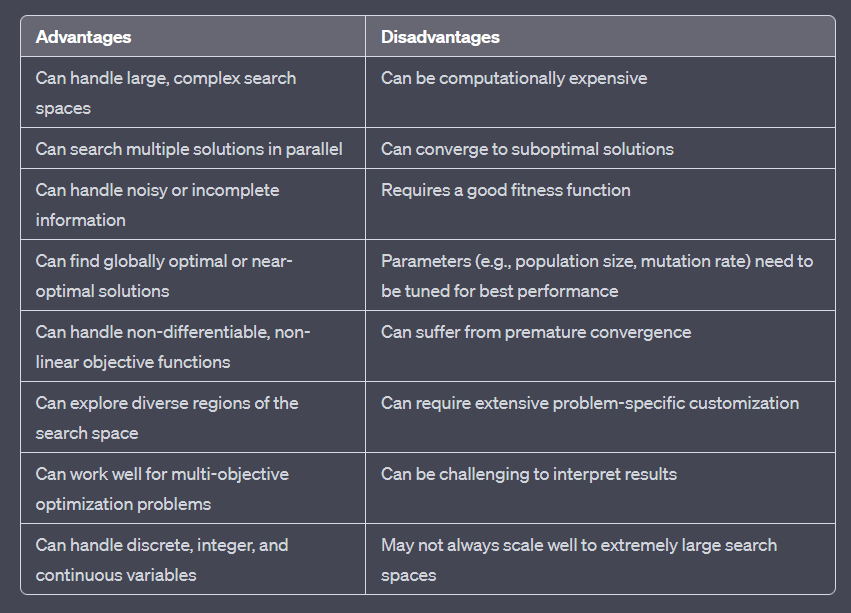

### **HILL CLIMBING**

In [ ]:

tcol =np.delete(col, 30)
# initialize the current feature vector
current_features = np.zeros(30, dtype=bool)
for i in range(10):
    current_features[i] = True

# define the neighborhood function to generate neighboring feature vectors
def neighborhood(current_features):
    neighbors = []
    for i in range(len(current_features)):
        neighbor = np.copy(current_features)
        neighbor[i] = not neighbor[i]
        neighbors.append(neighbor)
    return neighbors

#Mapping encoded features to actual features
def get_feature(cur_feat):
    features=[]
    for i in range(30):
        if(cur_feat[i]==1):
            features.append(tcol[i])
    return features

# define the hill climbing algorithm

def hill_climbing(current_features, get_fitness, neighborhood, get_feature):
    i=0;
    while i<2:
        # find the best neighbor
        neighbors = neighborhood(current_features)
        best_neighbor = None
        for neighbor in neighbors:
            if best_neighbor is None or get_fitness(get_feature(neighbor)) > get_fitness(get_feature(best_neighbor)):
                best_neighbor = neighbor
        # if the best neighbor is worse than the current, return the current
        if get_fitness(get_feature(best_neighbor)) <= get_fitness(get_feature(current_features)):
            return current_features
        # otherwise, move to the best neighbor and continue the search
        current_features = best_neighbor
        i+=1
        print(get_feature(current_features))
# run the hill climbing algorithm to select the best features
best_features = hill_climbing(current_features, get_fitness, neighborhood, get_feature)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V12']
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V12', 'V17']


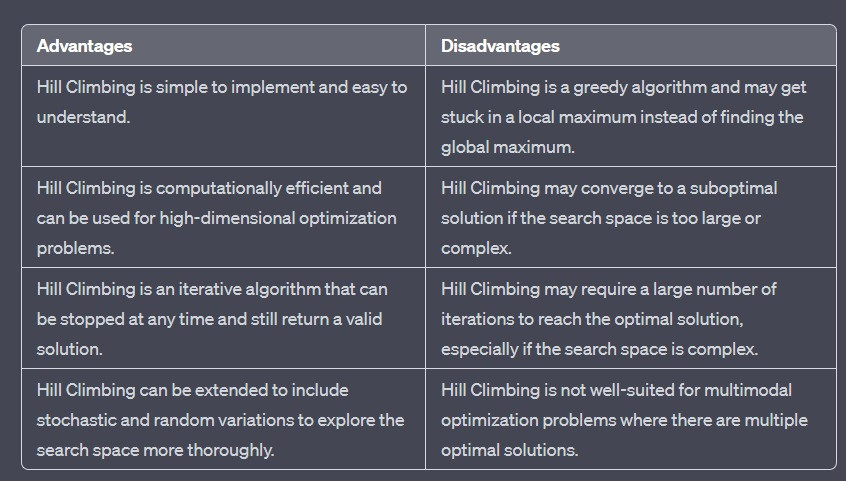

### **PARTICLE SWARM OPTIMIZATION**

In [ ]:
# Define the PSO parameters
n_particles = 3
max_iterations = 2
inertia_weight = 0.7
cognitive_weight = 1.5
social_weight = 1.5

# Load the clean Credit Card Fraud dataset
# Assume the dataset is loaded into X and y, where X is the feature matrix and y is the target variable

# Step 1: Generate initial population (feature names)
tcol =np.delete(col, 30)
A = tcol
n_features = 30
particle_position = np.zeros((n_particles, n_features), dtype=bool)
particle_velocity = np.zeros((n_particles, n_features), dtype=bool)
particle_best_position = np.zeros((n_particles, n_features), dtype=bool)
global_best_position = np.zeros(n_features, dtype=bool)
global_best_fitness = float('-inf')

#Mapping encoded features to actual features
def get_feature(cur_feat):
    features=[]
    for i in range(30):
        if(cur_feat[i]==1):
            features.append(tcol[i])
    return features

# Step 2: Initialize particles' positions and velocities
for i in range(n_particles):
    np.random.shuffle(A)
    particle_position[i] = np.random.rand(n_features) < 0.5
    particle_velocity[i] = np.random.rand(n_features) < 0.5
    particle_best_position[i] = particle_position[i].copy()

# PSO main loop
for iteration in range(max_iterations):
    # Step 3: Compute fitness for each particle
    particle_fitness = np.zeros(n_particles)
    for i in range(n_particles):
        # Use the selected features in particle_position as the candidate feature vector
        # Train a classifier with these features and compute its accuracy
        # Update particle_fitness[i] with the computed accuracy
        # Note: The higher the accuracy, the better the fitness
        cur_fitness= get_fitness(get_feature(particle_position[i]))
        # Update particle's best position and global best position
        if cur_fitness > particle_fitness[i]:
            particle_best_position[i] = particle_position[i].copy()
            particle_fitness[i]=cur_fitness
        if particle_fitness[i] > global_best_fitness:
            global_best_fitness = particle_fitness[i]
            global_best_position = particle_position[i].copy()

    # Update particles' velocities and positions
    for i in range(n_particles):
        # Update particle's velocity using PSO formula
        particle_velocity[i] = (inertia_weight * particle_velocity[i]
                                + cognitive_weight * np.random.rand(n_features) * (particle_best_position[i] ^particle_position[i])
                                + social_weight * np.random.rand(n_features) * (global_best_position ^particle_position[i]))

        # Update particle's position
        particle_position[i] = particle_position[i] ^ (particle_velocity[i] > 0.5)

# Extract the selected features from the global best position
selected_features = np.array(A)[global_best_position].tolist()

# Output the selected features
print("Selected Features:", selected_features)

Selected Features: ['V2', 'V11', 'V14', 'V12', 'V10', 'V1', 'V7', 'V16', 'V13', 'V24', 'V25', 'V3', 'V5', 'V20', 'V26', 'V27']


Simulated Annealing

In [ ]:


# define the objective function to calculate the density of a given region
def objective_function(region):
    # calculate the area of the region
    area = (region[1][0] - region[0][0]) * (region[1][1] - region[0][1])

    # calculate the number of points inside the region
    num_points = sum((region[0][0] <= x <= region[1][0]) and (region[0][1] <= y <= region[1][1]) for x, y in zip(df['Amount'], df['Class']))

    # calculate the density of the region
    density = num_points / area

    return density

# define the initial temperature, cooling rate, and number of iterations
initial_temperature = 100
cooling_rate = 0.003
num_iterations = 1000

# define the search space for the region
min_x = min(df['Amount'])
max_x = max(df['Amount'])
min_y = min(df['Class'])
max_y = max(df['Class'])

# define the initial solution as a randomly generated region
current_region = [[np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y)],
                  [np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y)]]

# define the best solution found so far as the initial solution
best_region = current_region
best_density = objective_function(current_region)

# iterate for the specified number of iterations
for i in range(num_iterations):
    # generate a new candidate solution by perturbing the current solution
    new_region = [[np.random.normal(current_region[0][0], 1), np.random.normal(current_region[0][1], 1)],
                  [np.random.normal(current_region[1][0], 1), np.random.normal(current_region[1][1], 1)]]

    # calculate the objective function value for the new solution
    new_density = objective_function(new_region)

    # if the new solution is better than the current solution, accept it
    if new_density < best_density:
        best_region = new_region
        best_density = new_density

    # calculate the acceptance probability for the new solution
    delta_density = new_density - best_density
    temperature = initial_temperature * math.exp(-cooling_rate * i)
    acceptance_probability = math.exp(-delta_density / temperature)

    # if the new solution is worse than the current solution, accept it with a certain probability
    if acceptance_probability > np.random.uniform(0, 1):
        current_region = new_region

# print the best solution found
print("Best region:", best_region)

Best region: [[96.85181797661403, 0.27224564810474405], [52.8538922979398, 0.2725887565756643]]


Displaying Data

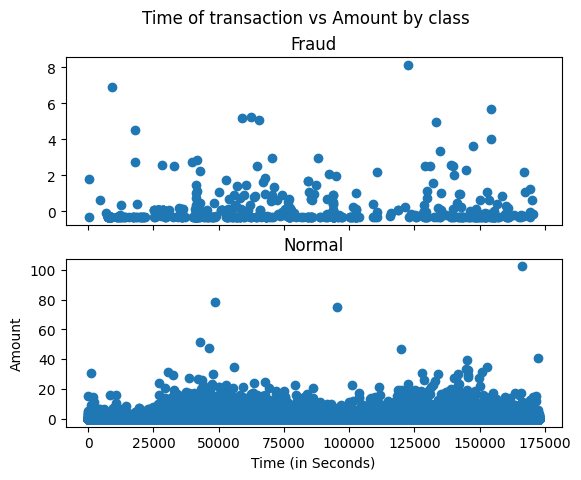

In [ ]:
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
Fraud.Amount.describe()


count    492.000000
mean       0.135382
std        1.026242
min       -0.353229
25%       -0.349231
50%       -0.316247
75%        0.070128
max        8.146182
Name: Amount, dtype: float64

In [ ]:
Normal.Amount.describe()

count    284315.000000
mean         -0.000234
std           0.999942
min          -0.353229
25%          -0.330640
50%          -0.265271
75%          -0.045177
max         102.362243
Name: Amount, dtype: float64

Text(0, 0.5, 'Frequency')

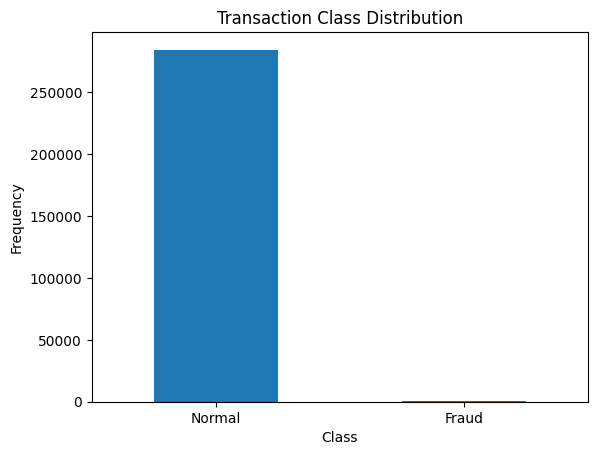

In [ ]:
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")
LABELS = ["Normal","Fraud"]
plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

Determine number of Fraud and Valid Transaction in the data set

In [ ]:
data1= df.sample(frac = 0.1,random_state=1)
Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.002005347593582888
Fraud Cases : 57
Valid Cases : 28424


Correlation plot

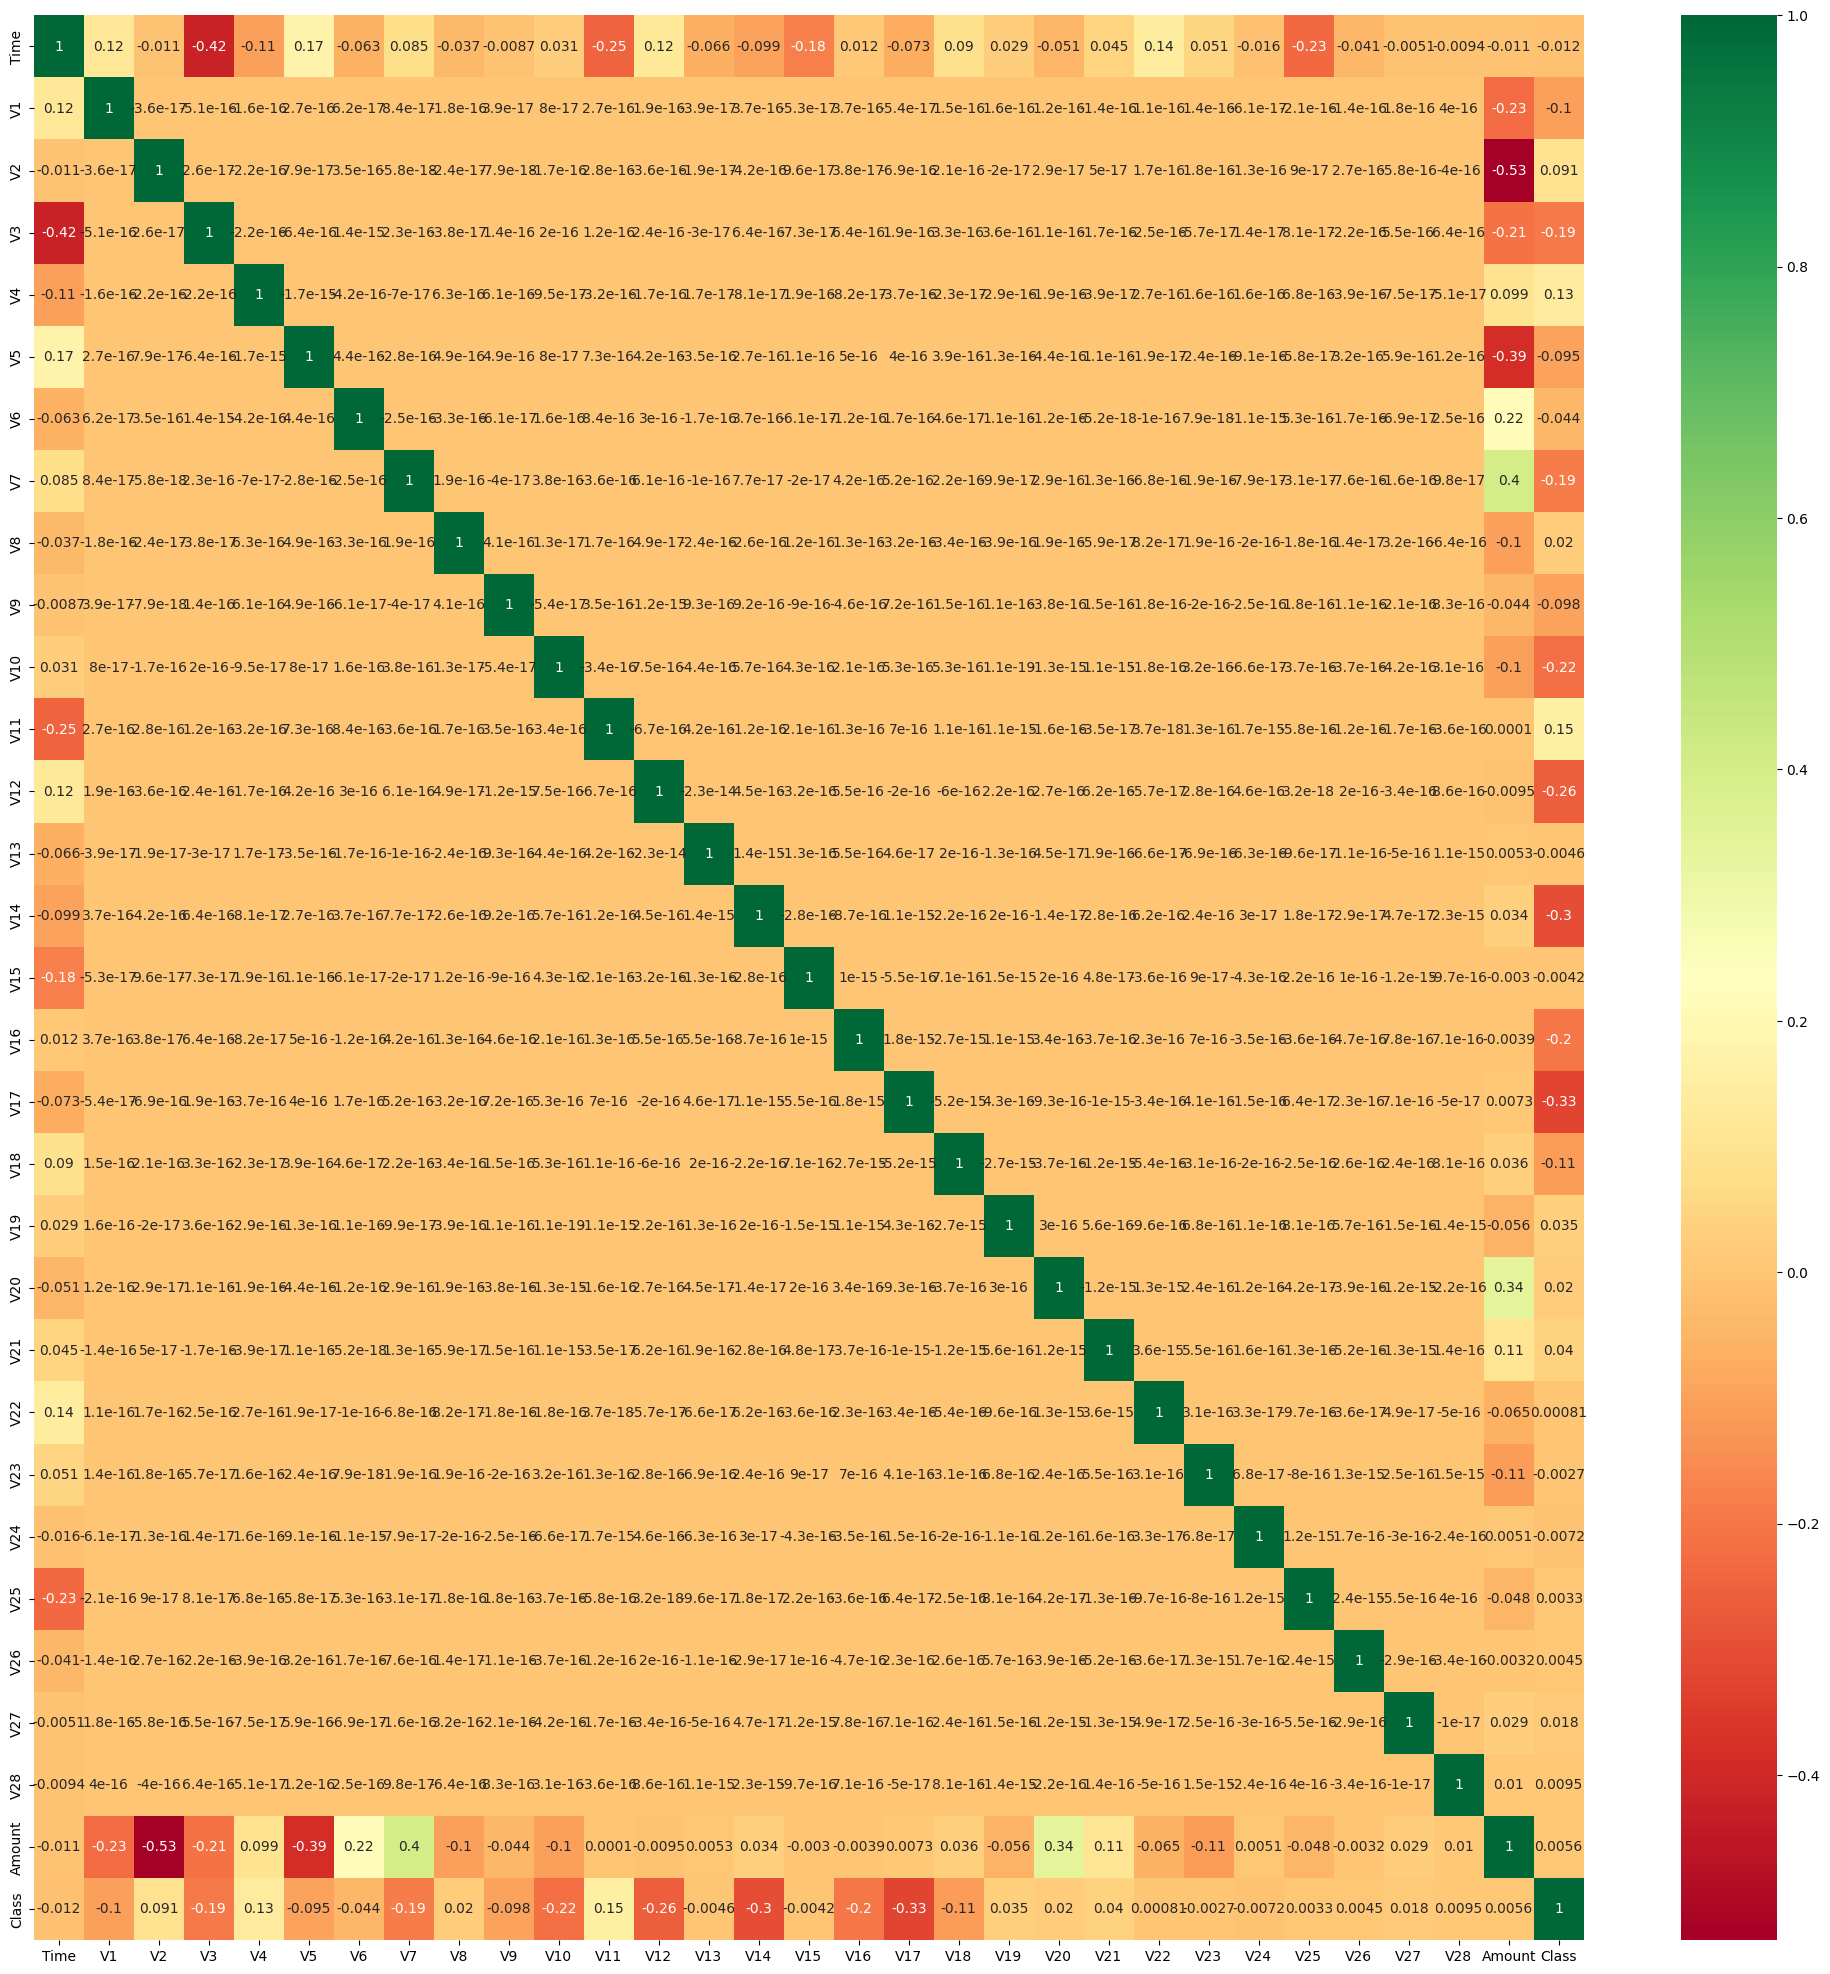

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

From the above Correlation matrix we can conclude that the parameteres V7 and V20 are highly correlated to the target variable i.e Class. Hence, these may have a higher weight while constructing a decision tree.

Local Outlier Factor :- The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.

In [ ]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


F1 Score and Accuracy generation:-

In [ ]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski',p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, max_iter=-1)

}

n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 55
Accuracy Score :
0.9980688880306169
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28441
           1       0.32      0.33      0.32        40

    accuracy                           1.00     28481
   macro avg       0.66      0.66      0.66     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 81
Accuracy Score :
0.9971559987359995
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28441
           1       0.00      0.00      0.00        40

    accuracy                           1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 15272
Accuracy Score :
0.4637828727923879
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.46  

- Isolation Forest detected 71 errors versus Local Outlier Factor detecting 105 errors vs. SVM detecting 14566 errors
- Isolation Forest has a 99.75% more accurate than LOF of 99.63% and SVM of 48.85%
- When comparing error precision & recall for 3 models , the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 27 % versus LOF detection rate of just 2 % and SVM of 0%.
- So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.
- We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases

Precision and recall are two common metrics used to evaluate the performance of a binary classification model. They are calculated based on the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) as follows:

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

Precision is the proportion of true positives among all predicted positives. In other words, it measures how many of the positive predictions made by the model are correct. A high precision means that the model is not making many false positive errors.

Recall is the proportion of true positives among all actual positives. In other words, it measures how many of the positive instances in the data are correctly identified by the model. A high recall means that the model is not missing many positive instances in the data.

Both precision and recall range from 0 to 1, with a higher score indicating better performance.

F1 score is a commonly used metric to evaluate the performance of a binary classification model. It is the harmonic mean of precision and recall, and is defined as:

F1 score = 2 * (precision * recall) / (precision + recall)

The F1 score ranges from 0 to 1, with a higher score indicating better performance. A perfect classifier has an F1 score of 1.0, while a random classifier has an expected F1 score of 0.5 for a balanced dataset.